# For each feature, test the sample model

Setting
- Extract existing feature set: 14 features (ZC / SSC / WL / WAMP / MAV / MSE / RMS / V3 / LD / DASDV / MFL / MPR / MAVS / WMAV)
- Subject: Hunmin / Xianyu
    1. Do intra-subject setting (H / X indepedently)
- Inter-session setting
    - Feature 1. Inter-session using centralized training
    - Feature 2. Inter-session using centralized training
    - ...

Questions
- Does feature set works differently per person?
- Does feature set works differently per session? (identical person)
- Is combining feature set good?
- Ultimately, which feature set we should select?

In [1]:
import sys
sys.path.append('../')
import config
import Trainer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
baseline_K_val = [18] #Train ~18 session data, test with 19~
K = baseline_K_val[0]

feature_names = ['Zero Crossing (ZC)', 'Slope Sign Changes (SSC)', 'Waveform Length (WL)', 'WAMP', 'Mean Absolute Value (MAV)', 'Mean Square (MS)', 'Root Mean Square (RMS)',
                 'v-order 3 (V3)', 'log detector (LD)', 'difference absolute standard deviation value (DASDV)', 'maximum fractal length (MFL)', 'myopulse percentage rate (MPR)',
                 'mean absolute value slope (MAVS)', 'weighted mean absolute (WMS)']
feature_idx = range(0,14)
feature_acc = []

for idx, f in enumerate(feature_idx):
    print(f"\n==========================================\nFeature {f} - {feature_names[idx]}\n==========================================\n")
    trainer = Trainer.TremorModelTrainer(config, subject="Hunmin")
    X_train, y_train, X_test, y_test = trainer.return_K_data(K, verbose=False)

    #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

    X_train = X_train[:, :, f:f+1, :]
    X_test = X_test[:, :, f:f+1, :]

    X_train = np.squeeze(X_train, axis=-1)  # Remove last dim → (100000, 4, 1)
    X_test = np.squeeze(X_test, axis=-1)

    print(X_train.shape, X_test.shape)

    acc, _ = trainer.train_multiple_dataset(X_train, y_train, X_test, y_test)
    feature_acc.append(acc)
    #trainer.run_all_sessions_training_K_data(K)
    #df = trainer.save_results(f'../Results/Baseline_results_train_with_{K}data_H.csv')
    print("\n")


Feature 0 - Zero Crossing (ZC)

(151851, 4, 14, 1) (151851,)
(151851, 4, 1) (240377, 4, 1)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 71.02%
Maximum validation accuracy : 78.63%
Accuracy of test dataset using model V0: 78.5088%



Feature 1 - Slope Sign Changes (SSC)

(151851, 4, 14, 1) (151851,)
(151851, 4, 1) (240377, 4, 1)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 72.87%
Maximum validation accuracy : 79.86%
Accuracy of test dataset using model V0: 79.8650%



Feature 2 - Waveform Length (WL)

(151851, 4, 14, 1) (151851,)
(151851, 4, 1) (240377, 4, 1)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 88.79%
Maximum validation accuracy : 86.99%
Accuracy of test dataset using model V0: 86.9330%



Feature 3 - WAMP

(151851, 4, 14, 1) (151851,)
(151851, 4, 1) (240377, 4, 1)
Start Training (total epochs: 50)...
Finish Training!

In [3]:
trainer = Trainer.TremorModelTrainer(config, subject="Hunmin")
X_train, y_train, X_test, y_test = trainer.return_K_data(K, verbose=False)
acc, _ = trainer.train_multiple_dataset_2D(X_train, y_train, X_test, y_test)
feature_acc.append(acc)

(151851, 4, 14, 1) (151851,)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 89.68%
Maximum validation accuracy : 88.0%
Accuracy of test dataset using model V0: 87.5100%


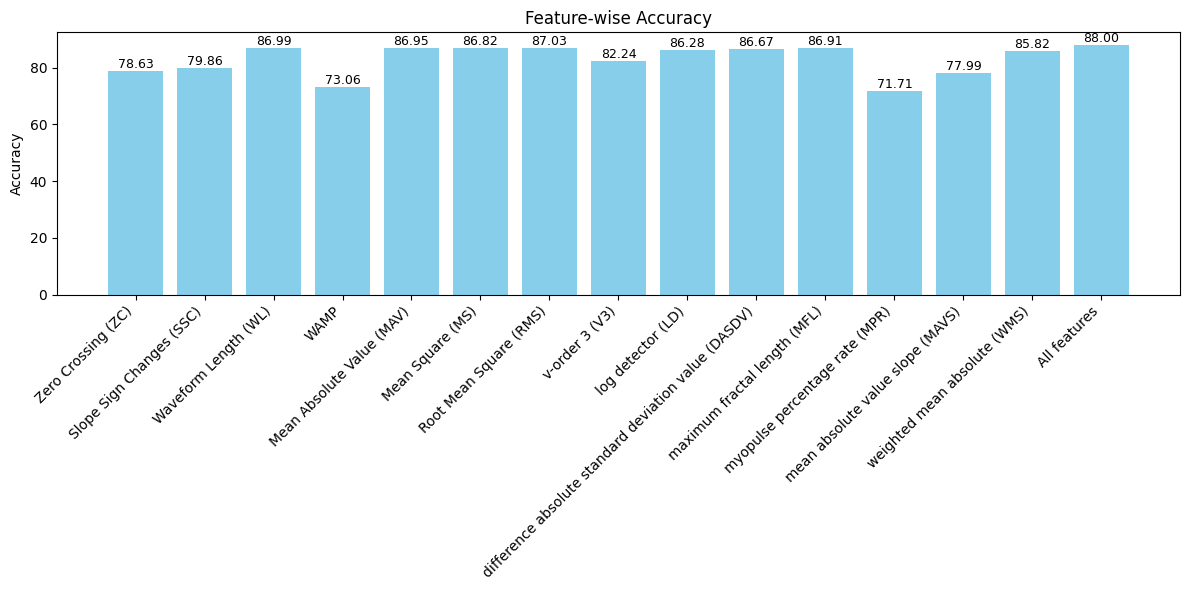

In [9]:
feature_names_idx = feature_names + ['All features']

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(feature_acc)), feature_acc, color='skyblue')
plt.xticks(range(len(feature_acc)), feature_names_idx, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Feature-wise Accuracy')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)
plt.show()